<a href="https://colab.research.google.com/github/rajalsrivastava/ML-Projects/blob/main/Preprocessing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sherians/datasets/student-por.csv",sep=";")

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

0   school      649 non-null    object ✅

 1   sex         649 non-null    object ✅

 2   age         649 non-null    int64 ❌

 3   address     649 non-null    object

 4   famsize     649 non-null    object

 5   Pstatus     649 non-null    object

 6   Medu        649 non-null    int64

 7   Fedu        649 non-null    int64

 8   Mjob        649 non-null    object

 9   Fjob        649 non-null    object

 10  reason      649 non-null    object

 11  guardian    649 non-null    object

 12  traveltime  649 non-null    int64

 13  studytime   649 non-null    int64

 14  failures    649 non-null    int64

 15  schoolsup   649 non-null    object

 16  famsup      649 non-null    object

 17  paid        649 non-null    object

 18  activities  649 non-null    object

 19  nursery     649 non-null    object

 20  higher      649 non-null    object

 21  internet    649 non-null    object

 22  romantic    649 non-null    object

 23  famrel      649 non-null    int64

 24  freetime    649 non-null    int64

 25  goout       649 non-null    int64

 26  Dalc        649 non-null    int64

 27  Walc        649 non-null    int64

 28  health      649 non-null    int64

 29  absences    649 non-null    int64

 30  G1          649 non-null    int64

 31  G2          649 non-null    int64

 32  G3          649 non-null    int64

In [9]:
from scipy.stats import f_oneway

gp_g3=df[df['school']=='GP']['G3']
ms_g3=df[df['school']=='MS']['G3']

f_statistic, p_value=f_oneway(gp_g3,ms_g3)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value>0.05:
  print("we accept the null hypotheses")
else:
  print("we reject the null hypotheses")


F-statistic: 56.890676863371326
P-value: 1.5661990923002604e-13
we reject the null hypotheses


<Axes: xlabel='school', ylabel='G3'>

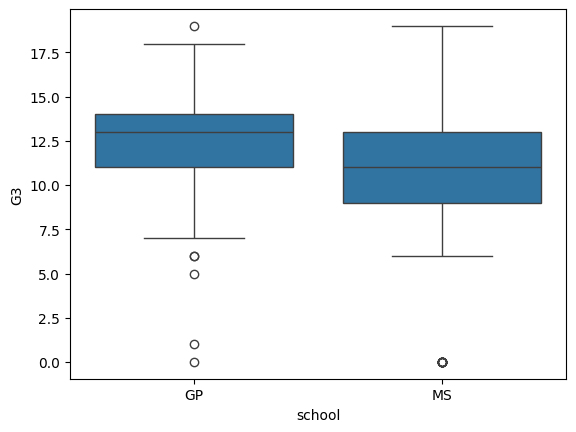

In [10]:
sns.boxplot(x="school",y="G3",data = df)

In [16]:
cor = df['age'].corr(df['G3'])

if abs(cor)>0.5:
  print("There is a strong correlation between age and G3.")
elif abs(cor)>0.3:
  print("There is a moderate correlation between age and G3.")
else:
  print("There is weak correlation between age and G3.")

There is weak correlation between age and G3.


<Axes: xlabel='age', ylabel='G3'>

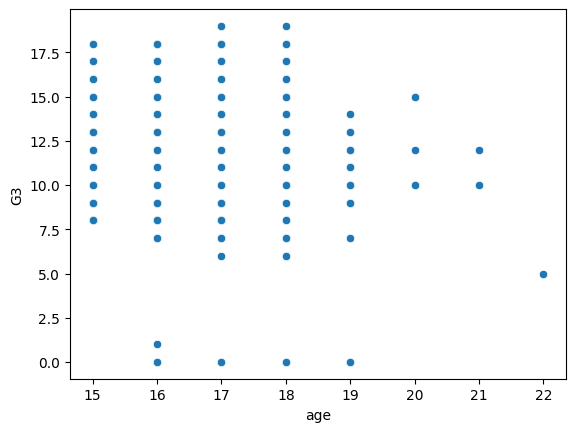

In [15]:
sns.scatterplot(x="age",y="G3",data = df)

In [17]:
categorical_cols = df.select_dtypes(include='object').columns
num_categorical_cols = len(categorical_cols)

print(f"Number of categorical columns in the dataset: {num_categorical_cols}")
print(f"Categorical columns: {list(categorical_cols)}")

Number of categorical columns in the dataset: 17
Categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [18]:
categorical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    elif df[col].dtype in ['int64', 'float64']:
        # Consider numeric columns with less than 5 unique values as categorical
        if df[col].nunique() < 5:
            categorical_features.append(col)

print(f"Number of identified categorical features: {len(categorical_features)}")
print(f"Categorical features: {categorical_features}")

Number of identified categorical features: 20
Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [19]:
from scipy.stats import f_oneway

def analyze_categorical_impact_on_g3(dataframe, categorical_features_list, target_column='G3', alpha=0.05):
    """
    Performs an F-test (ANOVA) for each categorical feature against a numerical target column.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        categorical_features_list (list): A list of categorical column names.
        target_column (str): The name of the numerical target column (default is 'G3').
        alpha (float): The significance level for hypothesis testing (default is 0.05).
    """
    print(f"Analyzing impact of categorical features on {target_column}:\n")

    for feature in categorical_features_list:
        print(f"--- Analyzing '{feature}' ---")
        # Get unique categories for the current feature
        categories = dataframe[feature].unique()

        # Collect G3 values for each category
        g3_per_category = [dataframe[dataframe[feature] == cat][target_column] for cat in categories]

        # Perform one-way ANOVA
        f_statistic, p_value = f_oneway(*g3_per_category)

        print(f"  F-statistic: {f_statistic:.4f}")
        print(f"  P-value: {p_value:.4f}")

        if p_value < alpha:
            print(f"  Conclusion: Reject the null hypothesis. There is a significant difference in {target_column} across categories of '{feature}'.")
        else:
            print(f"  Conclusion: Accept the null hypothesis. There is NO significant difference in {target_column} across categories of '{feature}'.")
        print("\n")

# The categorical features identified in the previous step
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Call the function with your DataFrame and the list of categorical features
analyze_categorical_impact_on_g3(df, categorical_features)

Analyzing impact of categorical features on G3:

--- Analyzing 'school' ---
  F-statistic: 56.8907
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a significant difference in G3 across categories of 'school'.


--- Analyzing 'sex' ---
  F-statistic: 10.9623
  P-value: 0.0010
  Conclusion: Reject the null hypothesis. There is a significant difference in G3 across categories of 'sex'.


--- Analyzing 'address' ---
  F-statistic: 18.7079
  P-value: 0.0000
  Conclusion: Reject the null hypothesis. There is a significant difference in G3 across categories of 'address'.


--- Analyzing 'famsize' ---
  F-statistic: 1.3138
  P-value: 0.2521
  Conclusion: Accept the null hypothesis. There is NO significant difference in G3 across categories of 'famsize'.


--- Analyzing 'Pstatus' ---
  F-statistic: 0.0004
  P-value: 0.9847
  Conclusion: Accept the null hypothesis. There is NO significant difference in G3 across categories of 'Pstatus'.


--- Analyzing 'Mjob' ---
  F-statist

In [20]:
from scipy.stats import f_oneway

# Using the 'categorical_features' list already defined in the notebook state
target_column = 'G3'
alpha = 0.05

significant_features = []

for feature in categorical_features:
    categories = df[feature].unique()
    g3_per_category = [df[df[feature] == cat][target_column] for cat in categories]

    # Check if there are enough groups to perform ANOVA
    if len(g3_per_category) > 1:
        # Ensure each group has at least one observation
        g3_per_category_filtered = [g for g in g3_per_category if not g.empty]

        if len(g3_per_category_filtered) > 1:
            f_statistic, p_value = f_oneway(*g3_per_category_filtered)

            if p_value < alpha:
                significant_features.append(feature)
        else:
            print(f"Warning: Not enough non-empty groups for ANOVA for feature '{feature}'. Skipping.")
    else:
        print(f"Warning: Only one or no category found for feature '{feature}'. Skipping ANOVA.")

print("Features where the null hypothesis was rejected (significant impact on G3):")
print(significant_features)

Features where the null hypothesis was rejected (significant impact on G3):
['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'higher', 'internet', 'romantic']


In [21]:
def get_numerical_features(dataframe, categorical_features_list):
    """
    Identifies non-categorical (numerical) columns in a DataFrame.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        categorical_features_list (list): A list of identified categorical column names.

    Returns:
        list: A list of non-categorical (numerical) column names.
    """
    all_columns = dataframe.columns.tolist()
    numerical_features = [col for col in all_columns if col not in categorical_features_list]
    return numerical_features

# Assuming 'categorical_features' list is already defined from previous steps
numerical_cols = get_numerical_features(df, categorical_features)

print(f"Number of non-categorical (numerical) features: {len(numerical_cols)}")
print(f"Non-categorical (numerical) features: {numerical_cols}")

Number of non-categorical (numerical) features: 13
Non-categorical (numerical) features: ['age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [22]:
new_df = df[['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures', 'higher', 'internet', 'romantic','age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']]

In [23]:
new_df

,school,sex,address,Mjob,Fjob,reason,traveltime,studytime,failures,higher,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,U,at_home,teacher,course,2,2,0,yes,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,U,at_home,other,course,1,2,0,yes,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,U,at_home,other,other,1,2,0,yes,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,U,health,services,home,1,3,0,yes,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,U,other,other,home,1,2,0,yes,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,services,other,course,1,3,1,yes,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,U,teacher,services,course,1,2,0,yes,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,U,other,other,course,2,2,0,yes,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,U,services,services,course,2,1,0,yes,...,2,4,5,3,4,2,6,10,10,10
